In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [113]:
wine = load_wine()
df = pd.DataFrame(data= wine.data, columns= wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [114]:
df.isna().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [115]:
# Independent and dependent features
from sklearn.model_selection import train_test_split
x = wine.data
y = wine.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [116]:
# Pre-Processing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [117]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [118]:
parameters = {'max_depth': [1,2,3,4,5], 'criterion':['gini', 'entropy', 'log_loss'], 'splitter': ['best','random'], 'max_features': ['auto','sqrt','log2']}

In [119]:
from sklearn.model_selection import GridSearchCV
tree_cv = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy')

In [120]:
tree_cv.fit(x_train,y_train)

d:\Coding\Personal\Learning\ML\Practice_Scikit\ml\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Coding\Personal\Learning\ML\Practice_Scikit\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Coding\Personal\Learning\ML\Practice_Scikit\ml\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "d:\Coding\Persona

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'log_loss'


In [121]:
tree_cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [122]:
tree_cv.best_score_

np.float64(0.9583333333333333)

In [123]:
y_pred = tree_cv.predict(x_test)

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.9491525423728814


[Text(0.4, 0.9, 'x[11] <= -0.426\nlog_loss = 1.562\nsamples = 119\nvalue = [45, 44, 30]'),
 Text(0.2, 0.7, 'x[9] <= -0.533\nlog_loss = 0.742\nsamples = 38\nvalue = [0, 8, 30]'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.1, 0.5, 'log_loss = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.3, 0.5, 'x[9] <= -0.035\nlog_loss = 0.337\nsamples = 32\nvalue = [0, 2, 30]'),
 Text(0.2, 0.3, 'x[6] <= -0.709\nlog_loss = 0.863\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(0.1, 0.1, 'log_loss = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.3, 0.1, 'log_loss = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.4, 0.3, 'log_loss = 0.0\nsamples = 25\nvalue = [0, 0, 25]'),
 Text(0.6, 0.7, 'x[0] <= -0.331\nlog_loss = 0.991\nsamples = 81\nvalue = [45, 36, 0]'),
 Text(0.5, 0.8, '  False'),
 Text(0.5, 0.5, 'log_loss = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.7, 0.5, 'x[12] <= -0.541\nlog_loss = 0.469\nsamples = 50\nvalue = [45, 5, 0]'),
 Text(0.6, 0.3, 'log_loss = 0.0\nsamples = 4\nvalue = [0, 4, 0]'

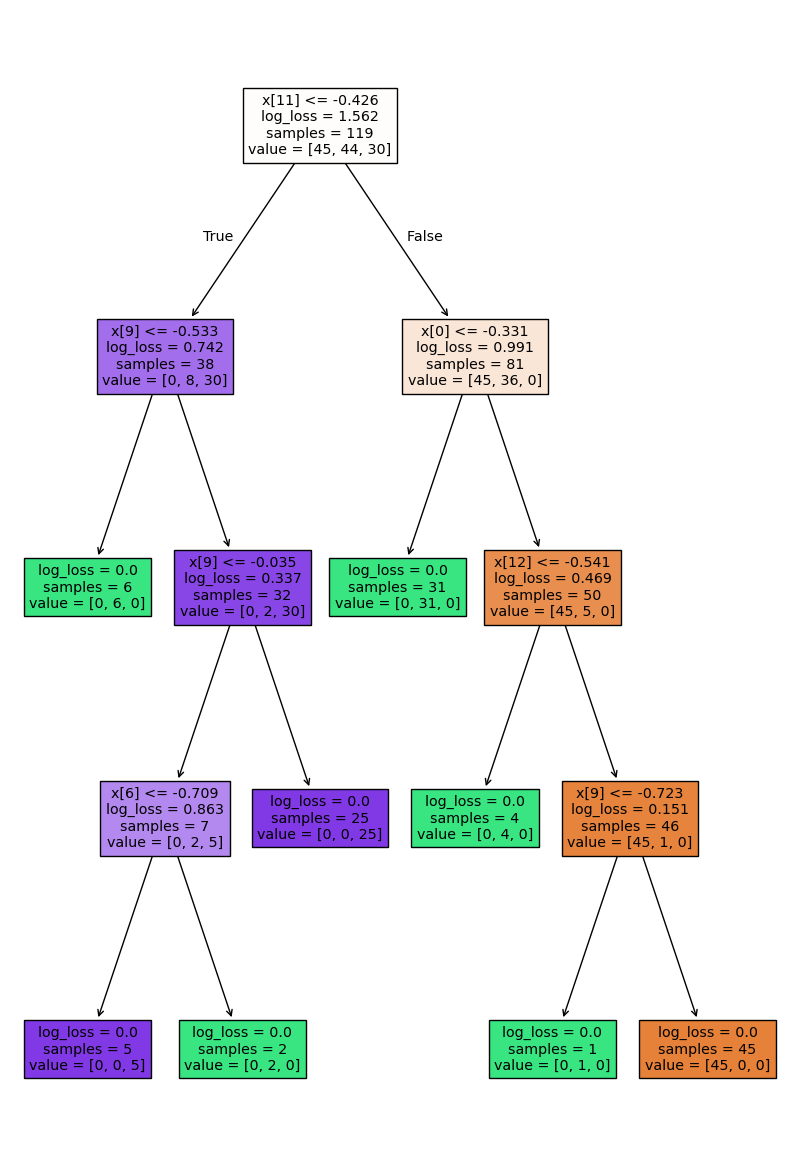

In [125]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,15))
plot_tree(decision_tree=tree_cv.best_estimator_, filled=True)